# LAB 2: MEDICAL IMAGE SEGMENTATION

The goal of this lab practice is for the student to become **familiar** with the different basic methods of
segmentation of medical images. In particular, we will work with **thresholding, region growing and watershed
algorithms**, in addition to introducing **more advanced segmentation algorithms available in the state-of-the-
art.**

As in Lab 1, to check the progress in each of the sections, **you can use examples of medical images of your
choice (either from those available in Aula Virtual or obtained from the Internet).**

## PART 1: THRESHOLDING, REGION GROWING AND WATERSHED

First, **thresholding** is a segmentation technique that separates the pixels of an image according to their gray level. Therefore, it is necessary to correctly select the threshold that allows to separate the sets of gray levels associated with different structures in the image.

On the other hand, the **region growing method** takes as input parameters a set of **seeds** together with the image. These seeds mark the area or objects of the image to be segmented. In this way, the region will grow from these seeds if adjacent pixels meet a certain homogeneity criterion with respect to them.

Finally, the **watershed algorithm** is a morphology-based segmentation technique that allows you to find regions of an image. It is a widely used technique for segmentation and processing of medical images. The basic idea of this algorithm is to consider a numerical image as a topographical relief where the intensity of each pixel corresponds to the height above the relief. The simplest comparation of this segmentation method is to compare it with the flooding of topographical relief, assuming that the water flows of the regional minimums (regional minimum: flat area such that the level of all neighboring pixels is strictly higher).

In this exercise you should **evaluate the three presented segmentation algorithms with different medical
images and anatomical structures.** You should also **compare the performance of these segmentation
algorithms**, as well as **the influence of their adjustable parameters.** Moreover, you should **justify which
segmentation algorithm would be the one of your choice for each anatomical structure.**

Furthermore, you should **discuss whether the previously obtained segmentations could be improved using
pre- and post-processing techniques**, such as **histogram modifications, filtering, and/or morphological
processing.** You should apply such methodologies on the images you are working with to support your
hypothesis.

To do this exercise **you will need to search for implementations of these algorithms on the Internet.**
***

### Libraries

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import io 
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

***
### Picture 1 : BrainCT

(-0.5, 255.5, 255.5, -0.5)

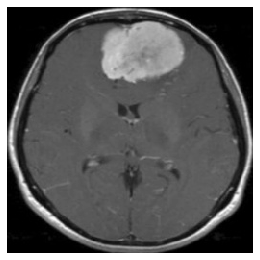

In [2]:
image = io.imread('Images/Cancer.tif')
image=image[:,:,0] # image rgb to gray

io.imshow(image)
plt.axis('off')

>This is an image of a brain cancer located in the temporal lob. The tumor is big an is segmentation should be easy because of the hight contrast beetween the brain cells and the tumor.
***

* Thersholding

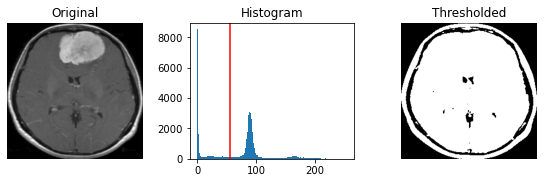

In [3]:
thresh = threshold_otsu(image) # Auto detection of the thresh by the Otsu's technique
binary = image > thresh # Binarisation of the image

# Display
fig, axes = plt.subplots(ncols=3, figsize=(10, 2.5))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

> As we can see, the Otsu's Thresholding technique is not efficient to segmented the tumor. Here we have segmented the backgroung and the image. This is because the histogram is not bimodal. 
We can see a pick at n = 90 so let's see what happend if we chose the threshold at 100 for exemple :

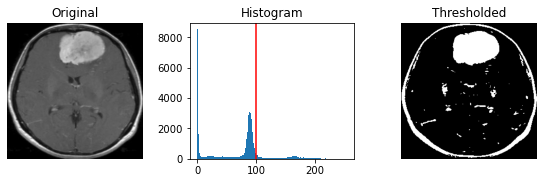

In [4]:
thresh = 100
binary = image > thresh # Binarisation of the image

# Display
fig, axes = plt.subplots(ncols=3, figsize=(10, 2.5))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

> Here, the segmentation is much more better, we can make out the tumor mass. Some other brain part appeared, so we can increase the thresh

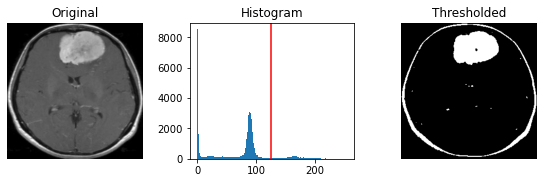

In [5]:
thresh = 125
binary = image > thresh # Binarisation of the image

# Display
fig, axes = plt.subplots(ncols=3, figsize=(10, 2.5))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

> For the value 125 the result is better than the 100 value. Most of the part of the brain cells deseapered and the tumor is well segmented. But we can see a black point in the middle of it that is mean that we start loosing informations about the region so we cannot go futher wirh the thresh.

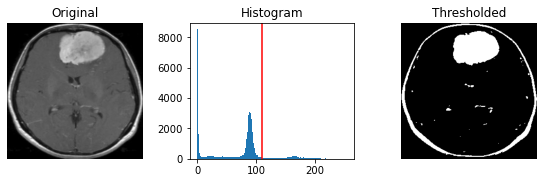

In [6]:
thresh = 110
binary = image > thresh # Binarisation of the image

# Display
fig, axes = plt.subplots(ncols=3, figsize=(10, 2.5))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

> 110 seem to be a good value for the thresh, we don't have anymore the black hole in the middle.
***
* Region growing

* Watershed

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import median

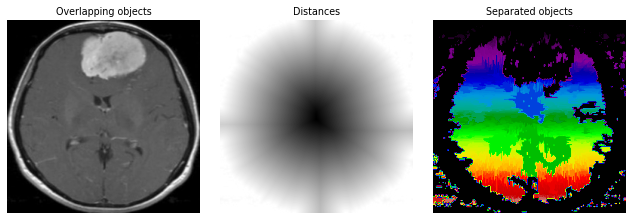

In [76]:
image = io.imread('Images/Cancer.tif')
image=image[:,:,0] # image rgb to gray

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

>If we apply just the watershed algorithm we obtain bad results. If we apply a median filter and if we binarize the image, we obtain the result as follow :

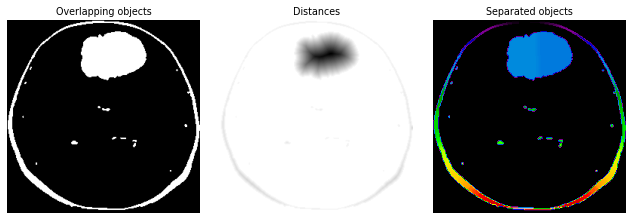

In [80]:
image = io.imread('Images/Cancer.tif')
image=image[:,:,0] # image rgb to gray

image = median(image)

thresh = 110

image = image > thresh

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

>The result is better, the tumor is well segmented.

### Picture 2 : ChestCT

(0.0, 1.0, -1024.0, 1024.0)

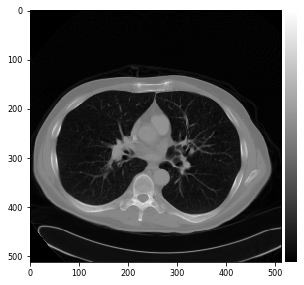

In [30]:
image=io.imread('Images/ChestCT.tif')

io.imshow(image, cmap='gray')
plt.axis('off')


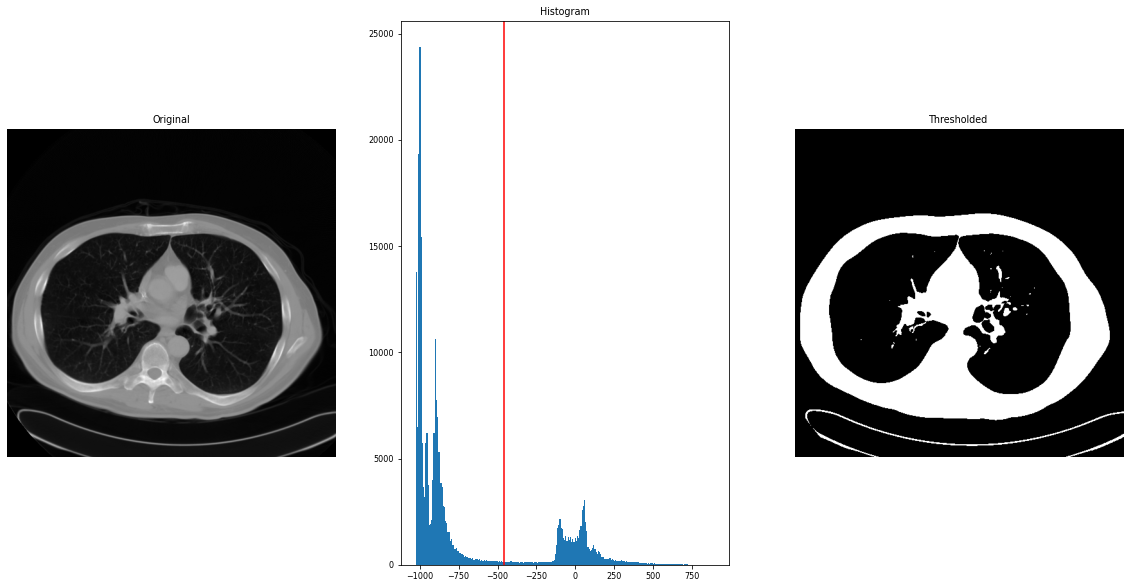

In [34]:
thresh = threshold_otsu(image) # Auto detection of the thresh by the Otsu's technique
binary = image > thresh # Binarisation of the image

# Display
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

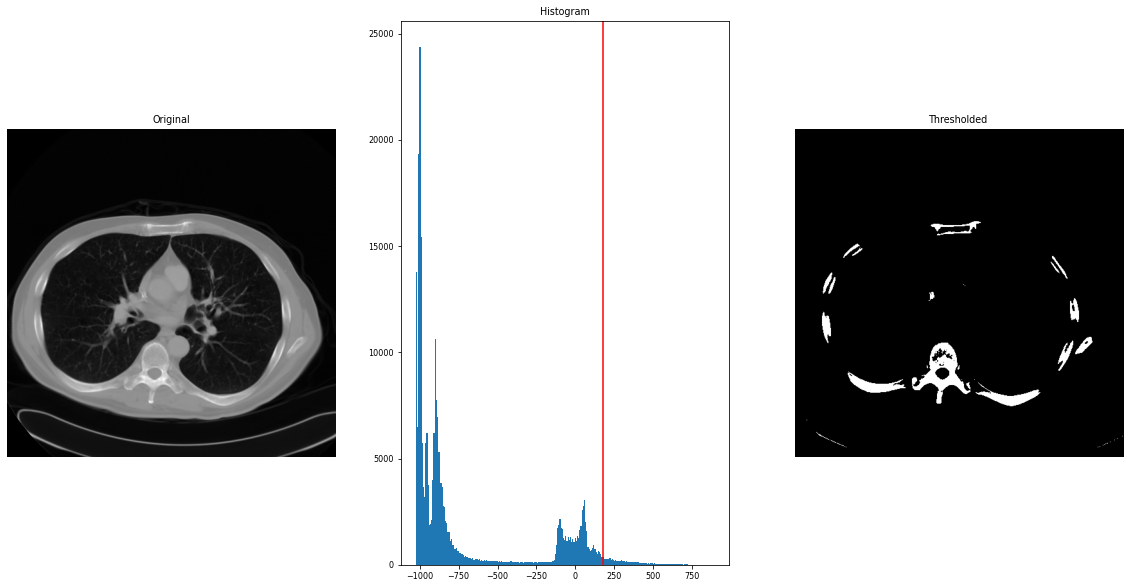

In [64]:
thresh = 180
binary = image > thresh # Binarisation of the image

# Display
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(180, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

>With this thresh, we can see a calcification in the hearth. We can multiply the binary image and the original image to apply a mask.

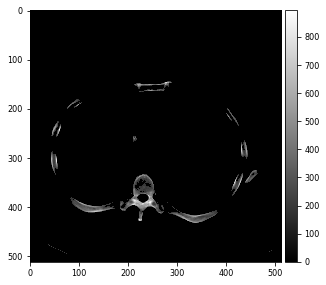

In [65]:
image = image * binary
io.imshow(image, cmap='gray')

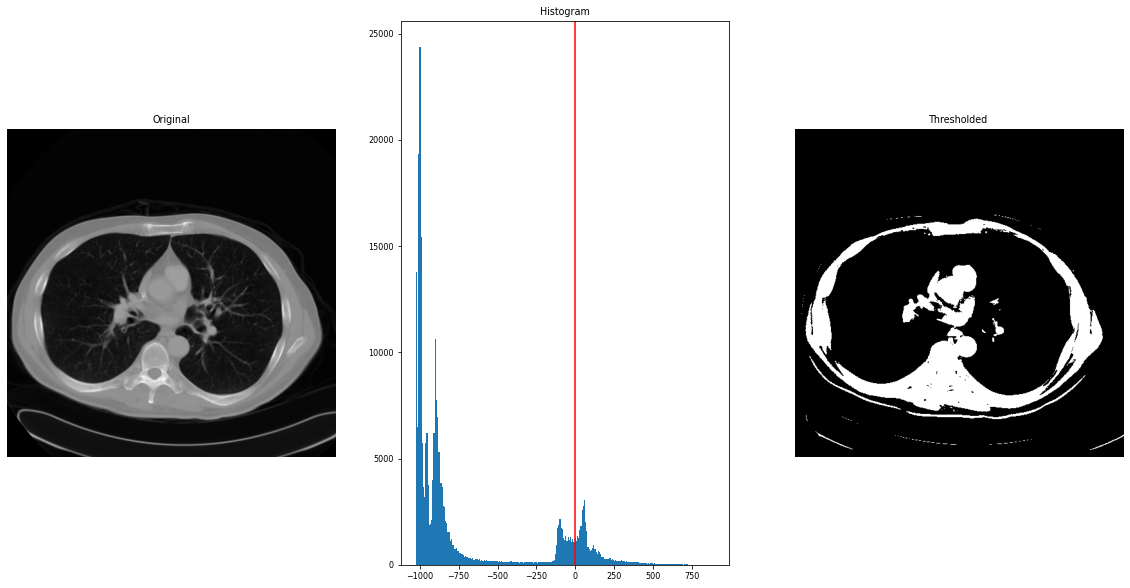

In [56]:
thresh = 0
binary = image > thresh # Binarisation of the image

# Display
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
ax = axes.ravel()

ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

* Watershed

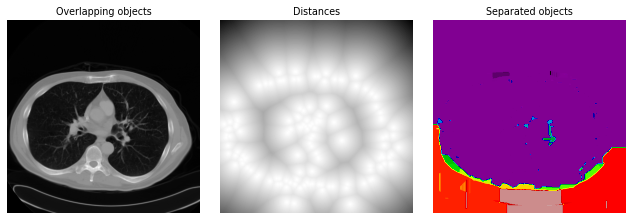

In [74]:
image = io.imread('Images/ChestCT.tif')
image = np.array(image, dtype='int')

distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

>The result of the segmentation is not good. We can try to apply a median filter.

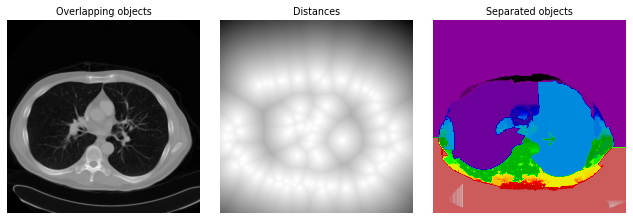

In [75]:
image = io.imread('Images/ChestCT.tif')
image = np.array(image, dtype='int')

image = median(image)

distance = ndi.distance_transform_edt(image)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

>Here we can see, after appling a median filter, we have segmented the two lungs but for the smallers structures as the heart it is mode difficult.

***
## PART 2: ACTIVE CONTOURS

The segmentation methods exposed are not the only ones that exist, but we can find much more advanced
methods: based on active contours, deformable models, or even based on artificial intelligence techniques.

For the latter part of the lab practice it is proposed to resolve the following questions:

* Look for information about one of the most used active contour algorithms: the **snakes algorithm.**
Briefly explain what it is.
* Evaluate how **it works** in a segmentation scenario. Do it on previously used images and compare the
result of segmenting a certain area of that image both with snakes and with the algorithms seen
throughout this lab practice.

Note: there are several types of snakes. In this case, what it is requested is to work on the “simple” active
contour method:



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import io

In [11]:
image = io.imread('Images/Cancer.tif')
image = image[:,:,0] # image rgb to gray

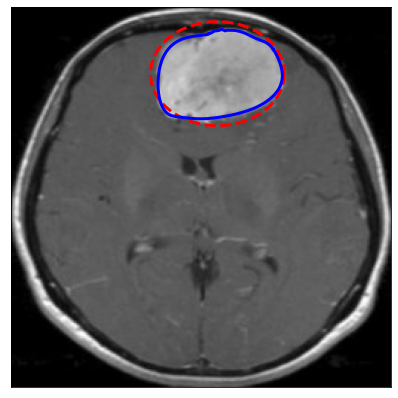

In [12]:
s = np.linspace(0, 2*np.pi, 400)
r = 45 + 35*np.sin(s)
c = 139 + 45*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(image, 3, preserve_range=False),
                       init, alpha=0.0001, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])

plt.show()

>The snake work very well with this image.

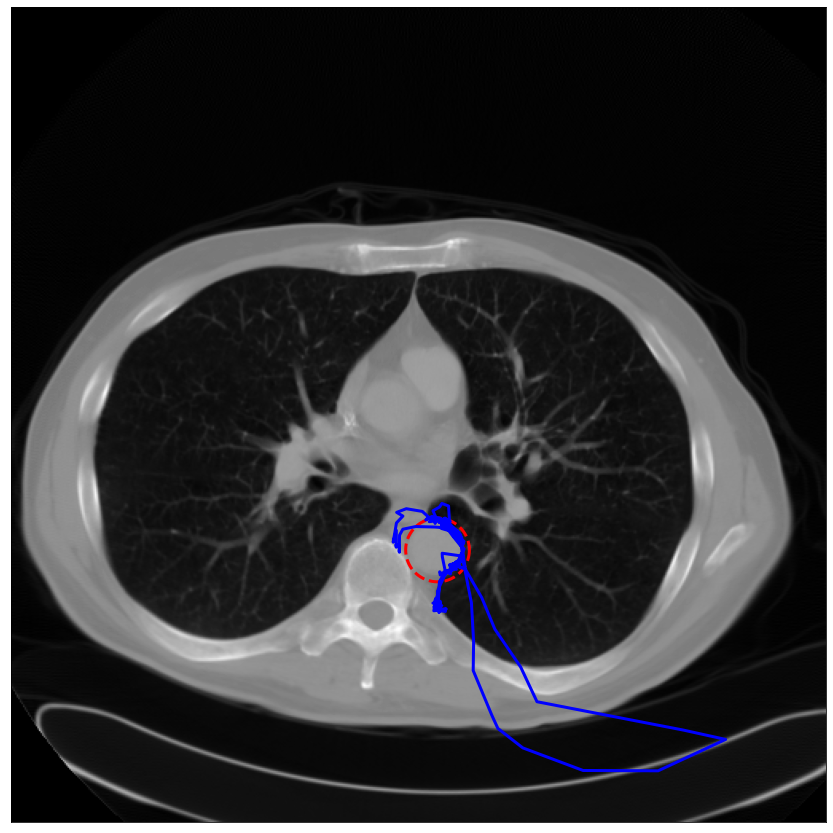

In [14]:
image = io.imread('Images/ChestCT.tif')

s = np.linspace(0, 2*np.pi, 400)
r = 341 + 20*np.sin(s)
c = 268 + 20*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(image, 3, preserve_range=False),
                       init, alpha=0.0001, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])

plt.show()

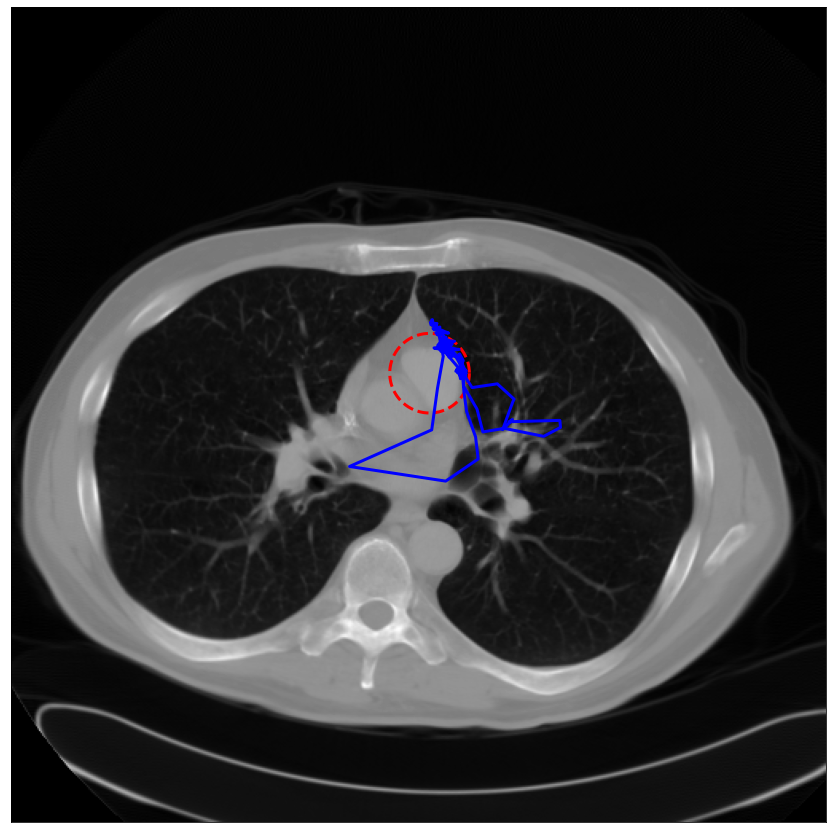

In [15]:
s = np.linspace(0, 2*np.pi, 400)
r = 230 + 25*np.sin(s)
c = 263 + 25*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(image, 3, preserve_range=False),
                       init, alpha=0.0001, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(image, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image.shape[1], image.shape[0], 0])

plt.show()

>For this image the contrast is too low, we can try again with an equalisated image.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:492: UserWarning: Downcasting int32 to uint16 without scaling because max value 894 fits in uint16
  return _convert(image, np.uint16, force_copy)
C:\Users\hugos\AppData\Local\Temp\ipykernel_20392\1946571165.py:61: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 4), dtype=np.object)


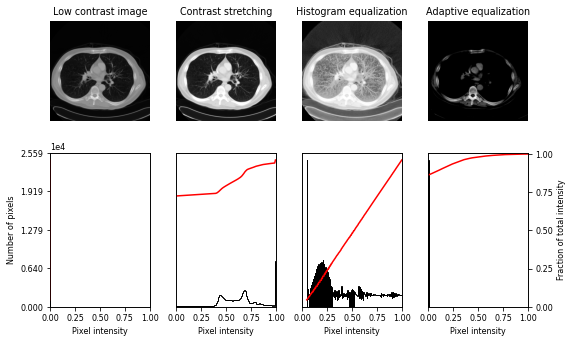

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import io
import matplotlib
from skimage import data, img_as_float
from skimage import exposure


plt.close('all')

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = io.imread('Images/ChestCT.tif')
img = np.array(img, dtype='int')

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

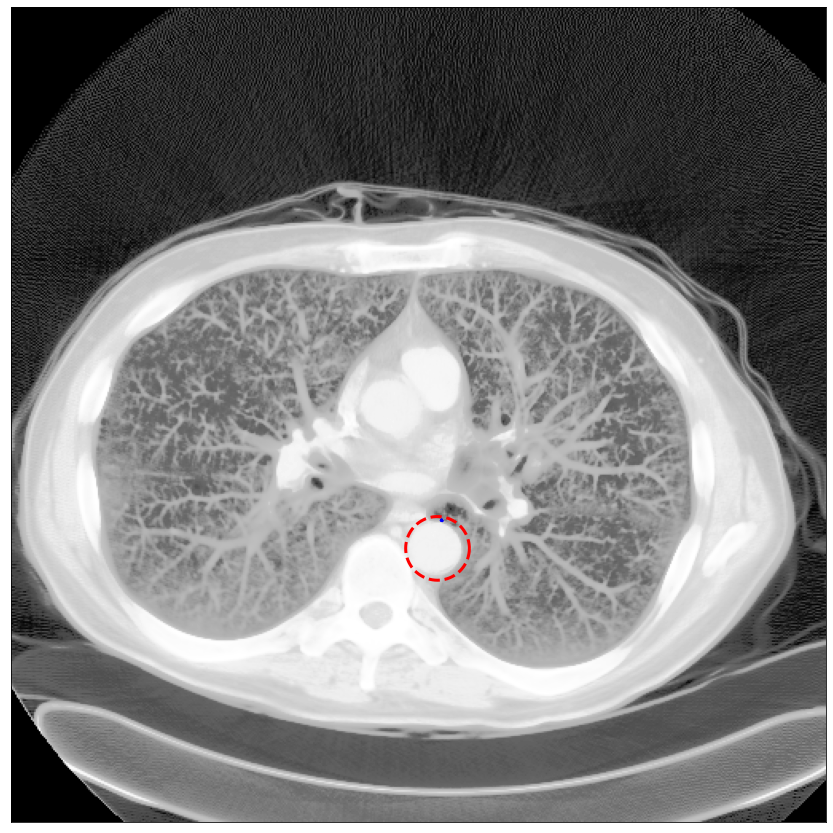

In [18]:
s = np.linspace(0, 2*np.pi, 400)
r = 340 + 20*np.sin(s)
c = 268 + 20*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img_eq, 3, preserve_range=False),
                        init, alpha=0.0001, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img_eq, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_eq.shape[1], img_eq.shape[0], 0])

plt.show()

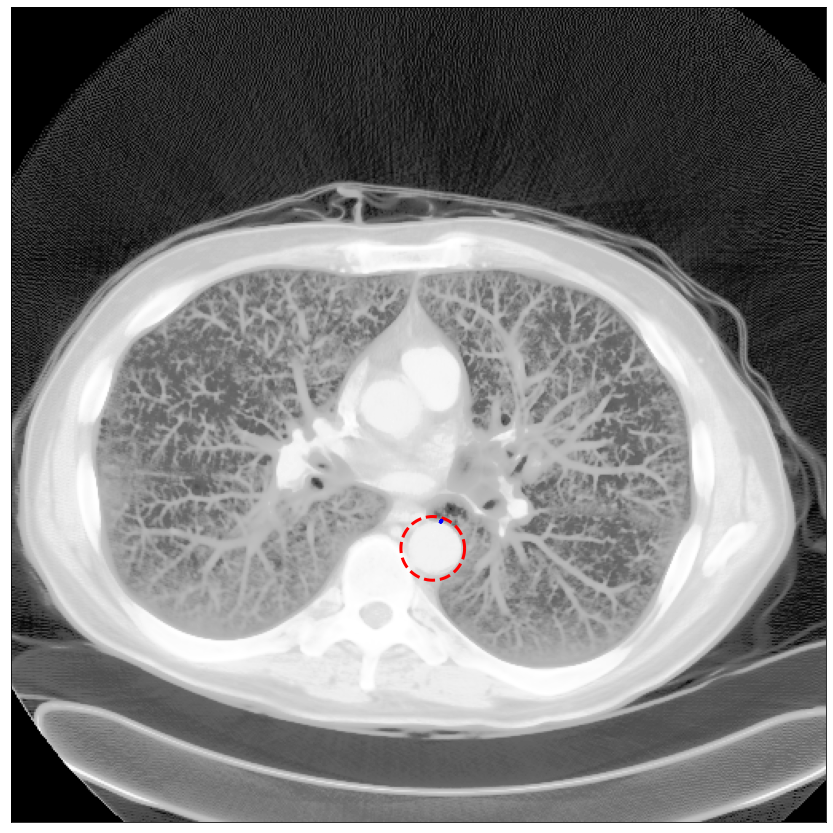

In [19]:
s = np.linspace(0, 2*np.pi, 400)
r = 340 + 20*np.sin(s)
c = 265 + 20*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img_eq, 3, preserve_range=False),
                        init, alpha=0.0001, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img_eq, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_eq.shape[1], img_eq.shape[0], 0])

plt.show()

>The active contour algorithm does not work well with this equalized image.

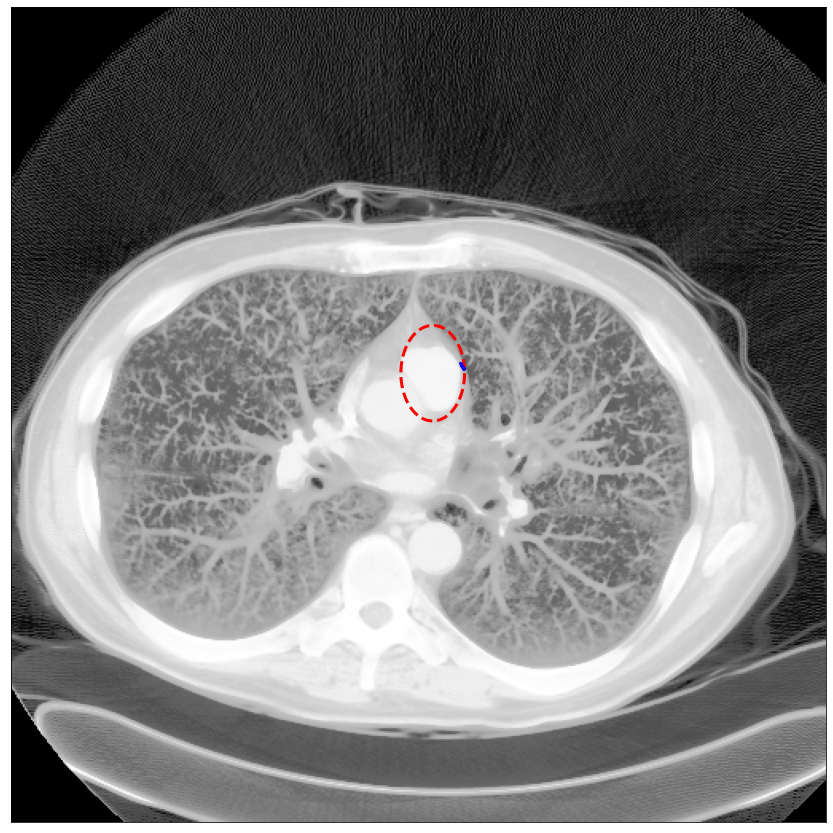

In [20]:
s = np.linspace(0, 2*np.pi, 400)
r = 230 + 30*np.sin(s)
c = 265 + 20*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img_eq, 3, preserve_range=False),
                        init, alpha=0.0001, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img_eq, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_eq.shape[1], img_eq.shape[0], 0])

plt.show()

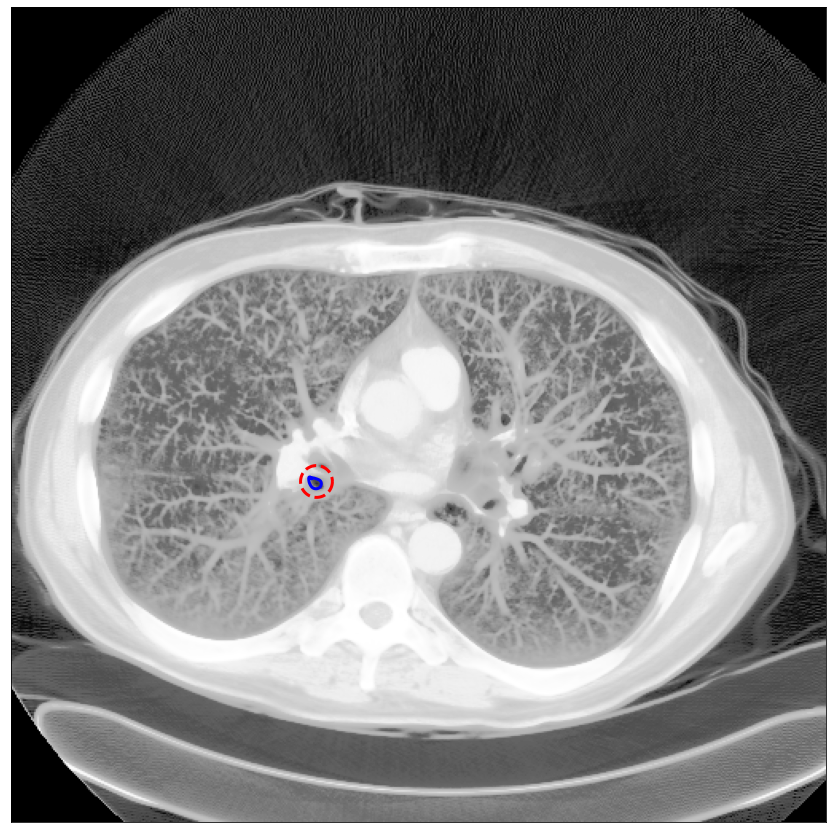

In [21]:
s = np.linspace(0, 2*np.pi, 400)
r = 298 + 10*np.sin(s)
c = 192 + 10*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img_eq, 3, preserve_range=False),
                        init, alpha=0.0001, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img_eq, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_eq.shape[1], img_eq.shape[0], 0])

plt.show()

>The algorith have no problems to segment the black parts of the image. Hight density beetwin whites and black pixels.  

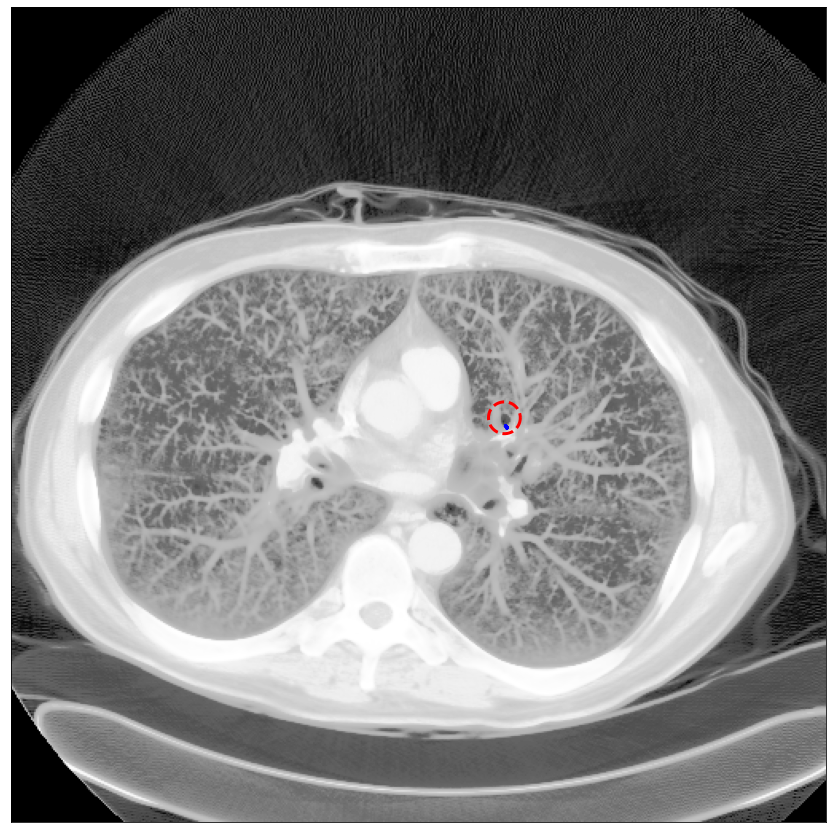

In [22]:
s = np.linspace(0, 2*np.pi, 400)
r = 258 + 10*np.sin(s)
c = 310 + 10*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img_eq, 3, preserve_range=False),
                        init, alpha=0.000001, beta=1, gamma=0.001)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img_eq, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img_eq.shape[1], img_eq.shape[0], 0])

plt.show()

>We can see that the active contour methode is not efficient with the chest image. It's due to the low contrast with the differents structures.